富士山下山問題

In [13]:
import os
os.getcwd()
import numpy as np
csv_path = "/content/drive/MyDrive/DIC/mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
fuji2 = fuji[0:140]
# print(fuji[130:140])
print(fuji2)

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 [    3.          35.139194   139.123441     0.         966.      ]
 [    4.          35.140878   139.12056      0.        1288.      ]
 [    5.          35.142562   139.117679     0.        1611.      ]
 [    6.          35.144246   139.114799     6.62      1933.      ]
 [    7.          35.145929   139.111917     7.21      2255.      ]
 [    8.          35.147613   139.109036    12.2       2577.      ]
 [    9.          35.149297   139.106155    54.41      2899.      ]
 [   10.          35.15098    139.103273   171.56      3222.      ]
 [   11.          35.152664   139.100392   177.84      3544.      ]
 [   12.          35.154347   139.09751    228.21      3866.      ]
 [   13.          35.15603    139.094628   275.38      4188.      ]
 [   14.          35.157714   139.091747   433.7

【問題1】データの可視化
Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。



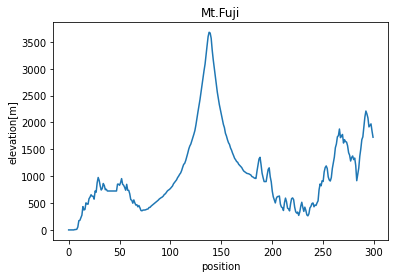

In [14]:
# # fuji[:,[0,3]]
import matplotlib.pyplot as plt
import numpy as np
# plt.plot(fuji[:,[0,3]])
plt.plot((fuji[0:,[0]]),(fuji[0:,[3]]))
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.title("Mt.Fuji")
# /*実際にグラフに出力*/
plt.show()

【問題2】ある地点の勾配を計算する関数を作成
「二次元配列と勾配問題」では各地点での勾配を最初に求めました。しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。


「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。


勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。



In [15]:
#求める関数をKOUBAI、勾配変数をkoubaiとする
import matplotlib.pyplot as plt
import numpy as np

# p=np.array(p)
fuji=np.array(fuji)

# print(fuji(131:132,3)) 
# print(fuji[130:131,3]) 
# print(fuji[131:132,0]) 
# print(fuji[130:131,[0]])
# print(fuji[0:2,[0]])
# def KOUBAI((fuji[0:1,[0]]),(fuji[1:2,[0]]),(fuji[0:1,[3]]),(fuji[1:2,[3]])):
fujix = fuji[:,0]
# a = np.array([1, 2, 3], dtype='int')
# print(a.dtype)
fujix = np.array(fujix, dtype='int')
# print(fujix.dtype)
# print(fujix)
fujiy = fuji[:,3]
fujiy = np.array(fujiy, dtype='int')
# print(fujiy.dtype)
# print(fujiy)
num = 0
# koubai = []
#今いる地点point1とする
# def KOUBAI(fuji,point1):
# print(fujiy[229])
# print(fujiy[230])
# print(fujix[229])
# print(fujix[230])

def KOUBAI(point1):
  # num = (fujiy[(point1-1):(point1),3] - fujiy[(point1):(point1+1),3]) / (fujix[(point1-1):(point1),0] - fujix[(point1):(point1+1),0])
  num = (fujiy[point1-1] - fujiy[point1]) / (fujix[point1-1] - fujix[point1])
  # num = (int(fujiy[point1-1]) - int(fujiy[point1])) / (int(fujix[point1-1]) - int(fujix[point1]))
  # num = (int(np.round(fujiy[point1-1])) - int(np.round(fujiy[point1]))) / (int(np.round(fujix[point1-1])) - int(np.round(fujix[point1])))
  # print(num)
  # print(int(np.round(num)))
  num = (int(np.round(num)))
  if(num<0):
    num = 0
    return num
  else:
    return int(np.round(num))
  # for i in range(point1,1,-1):
    # num = (fujiy[i-1] - fujiy[i]) / (fujix[i-1] - fujix[i])
    # num = (fujiy[point1-1] - fujiy[point1]) / (fujix[point1-1] - fujix[point1])
    # print(num)
    # koubai.append(num)
  # print(koubai)
  # return num
#point1を１３６とすると
point1 = 136
# print(fujiy[136])
# KOUBAI(fuji,point1)
print(KOUBAI(point1))

168


【問題3】移動先の地点を計算する関数を作成
今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。


数式で表すと 「移動先の地点 = 今いる地点 - 
α
 ×今いる地点の勾配」 となります。


「今いる地点の勾配」は問題2で作成した関数の戻り値を使用してください。
α
 は0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わります。ここでは例えば0.2に設定してください。


《実装上の注意》


上記式を計算すると移動先の地点には浮動小数点数が現れますが、今回勾配の情報を得るためには地点は整数で表す必要があります。そのため、四捨五入による変換を行ってください。また、取り得ない値となった場合の処理が必要です。例えば移動先の地点が負になると、そのようなデータが存在しないため、次に勾配が得られなくなります。

In [16]:
# from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN
#移動先の地点を計算する関数を作成 今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数名をDestination_point(移動先の地点)とする
#移動先の地点 = 今いる地点(fuji[i : i + 1,[0]]=fujix[0]と置く) - α(=0.2) ×今いる地点の勾配(問２からkoubaiと置く)

fujix = fuji[:,0]
# fujix = fuji[0:137,[0]]
# print(fujix)
fujiy = fuji[:,3]
# print(fujiy)

# point1 = 136
# koubai = KOUBAI(point1)

#今いる地点point2とする 
# num2 = 0
# Destination_point2 = []
def Destination_point(point2):
  num2 = 0
  # Destination_point2 = 0
  # print(fujix[point2])
  # print(fujix[10])
  # print(KOUBAI(point2))
  num2= fujix[point2]  - 0.2 * KOUBAI(point2)
  num3 =int(np.round(num2))
  # print(num3)
    # num2= fuji[point2,0]  - 0.2 * KOUBAI(point2)
  if(num3<0):
    Destination_point2 = 0
    return 0
      # num2 = int(np.round(np.abs(num2)))
      # Destination_point2.append(num2)
  else:
    # num2 =int(np.round(num2))
      # Destination_point2.append(num2)
    Destination_point2 = num3   
    return Destination_point2

point2 = 136
Destination_point(point2)


102

【問題4】山を下る関数を作成
山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。移動毎の地点はリストなどに記録して、これを関数の戻り値としてください。


最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。


《実装上の注意》


問題3で四捨五入を行っているため、移動先の地点が今いる地点と同じ場合になることがあります。移動量が減ってきたということなので、その時点で山を下りきったと判断してください。実際の勾配降下法ではこのようなことは起きません。

In [17]:
#「移動先の地点 = 今いる地点 - α ×今いる地点の勾配」
#山を下る関数を作成 山を下る関数：Create a function that goes down the mountain Function that goes down the mountain
#略して、Goes_down_the_mountainとする
#関数の戻り値を移動毎の地点：Point_for_each_moveとする
import math

fujix = fuji[:,0]
# print(fujix)
fujiy = fuji[:,3]
# print(fujiy)
# Point_for_each_move = []
# point2 = 136
def Goes_down_the_mountain(point2):
  # for i in range(point2,1,-1):
  Point_for_each_move = []
  nowPoint =  point2
  Point_for_each_move.append(nowPoint)
  # nextPoint = Destination_point(nowPoint)
  CNT = 0
  while(True):
    # print(nowPoint)
    nextPoint = Destination_point(nowPoint)
    # Point_for_each_move.append(nextPoint)
    # if(math.fabs(nextPoint  - nowPoint) <1):
    if(abs(nextPoint  - nowPoint) <1): #個々の絶対値つけた理由は差がマイナスになるかもしれないからつけた
    # if((abs(np.round(nextPoint))  - abs(np.round(nowPoint))) <=1):
      # print(nowPoint)
      # print(CNT)
      CNT = CNT + 1
      break
    elif(CNT >=20):
      break;
    else:
      # nextPoint = Destination_point(nowPoint)
      Point_for_each_move.append(nextPoint)
      nowPoint = nextPoint
      CNT = CNT + 1
  return Point_for_each_move

point2 = 136
Goes_down_the_mountain(point2)

[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70]

【問題5】下山過程の可視化
問題4における下山過程をMatplotlibを使いグラフで可視化してください。


《可視化例》


断面図の中に移動した地点を点で表示する
繰り返し毎の標高や勾配を折れ線グラフにする

136
3434.59


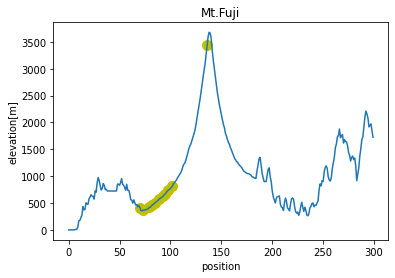

In [18]:
fujix = fuji[:,0]
# print(fujix)
fujiy = fuji[:,3]
# print(fujiy)

# point2 = 136
# # Goes_down_the_mountain(point2)
# # print(Goes_down_the_mountain(point2))

# Point_for_each_move = []
Pointy = []
point2 = 136
point3List = Goes_down_the_mountain(point2)
for j in point3List:
  fujiy = fuji[j,3]
  Pointy.append(fujiy)



# def Goes_down_the_mountain2(point2):
#   for j in range(point2,0,-1):
#     Pointy.append(int(np.round(fujiy[j])))
#   return Pointy
      

# point2 = 136
# Goes_down_the_mountain(point2)
# Pointy = Goes_down_the_mountain2(point2)
# print(Goes_down_the_mountain(point2))
# print(Pointy)


import matplotlib.pyplot as plt
import numpy as np

# point2 = 136
# Goes_down_the_mountain(point2)

print(point3List[0])
print(Pointy[0])
for i in range(0,11,1):
  plt.plot(point3List[i],Pointy[i],marker='o',color = 'y',markersize = 10)

plt.plot((fuji[0:,[0]]),(fuji[0:,[3]]))
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.title("Mt.Fuji")
# /*実際にグラフに出力*/
plt.show()

【問題6】初期値の変更
問題4では最初の「今いる地点」を136と固定しましたが、これを他の全ての点で計算してください。具体的には、「今いる地点」を変更できるようにするということです。

In [19]:
# fujix = fuji[:,[0]]
# # print(fujix)
# fujiy = fuji[:,[3]]
# # print(fujiy)
# Point_for_each_move = []
# #j2は、今いる地点で自由に変更できる
# def Goes_down_the_mountain(j2,fuji):
#   for j in range(j2,0,-1):
#     koubai = (fujiy[j-1] - fujiy[j]) / (fujix[j-1] - fujix[j])
#     Destination_point = (fujix[j]) - 0.2 * koubai
#     # print(Destination_point)
#     if(Destination_point < 0):
#       np.delete(Destination_point, np.where(Destination_point < 0))
#     else:
#       Point_for_each_move.append(int(np.round(Destination_point)))  #(fuji[i : i + 1,[0]])
#   return Point_for_each_move

# j2 = 10
# Goes_down_the_mountain(10,fuji)

import math

fujix = fuji[:,0]
# print(fujix)
fujiy = fuji[:,3]
# print(fujiy)
# Point_for_each_move = []

#自由に変更できる初期値をpoint3とする
def Goes_down_the_mountain2(point3):
  Point_for_each_move = []
  # Point_for_each_move.append(point3)
  for j in range(point3,0,-1):  #Goes_down_the_mountain(point2)
  # for j in Goes_down_the_mountain(point3):  #Goes_down_the_mountain(point2)
    # Point_for_each_move = []
    poList = Goes_down_the_mountain(j)
    # poList = Destination_point(j)
    Point_for_each_move.append(poList)
  return Point_for_each_move
  # print(Point_for_each_move)

point3 = 298
Point_for_each_move = Goes_down_the_mountain2(point3)

【問題7】初期値ごとの下山過程の可視化
問題6では全初期値の下山過程を計算しました。そこで、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。勾配降下法において 初期値 が結果に影響を与えることが確認できます。


《初期値とは》


今回の例での最初の地点のような値を初期値と呼びます。これを変更すると結果が変化します。例えば136と142では富士山の異なる斜面を下ることになります。

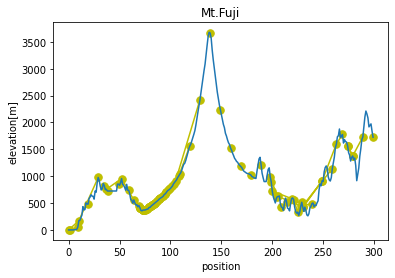

In [20]:
import matplotlib.pyplot as plt
import numpy as np
#いくつかの初期値j2とする。j2=136と１42にします。
#j2=136の場合
Pointy2 = []
point4 = 299
point4List = []
# point4List = Goes_down_the_mountain2(point4)
# point4List = Goes_down_the_mountain(point4) 
# point4List = Destination_point(point4) 
point4List = Goes_down_the_mountain2(point4) #Destination_point(nowPoint) 
# print(point4List)

for j in point4List:
  fujiy3 = fuji[j,3]
  Pointy2.append(fujiy3)
# print(point4List[0])
# print(Pointy2[0])

# for j in range(len(point4List)):
for j in range(0,299,10):
  # print(j)
  plt.plot(point4List[j],Pointy2[j],marker='.',color = 'y',markersize = 15)
plt.plot((fuji[0:,[0]]),(fuji[0:,[3]]))
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.title("Mt.Fuji")
# /*実際にグラフに出力*/
plt.show()


# plt.plot((fuji[0:,[0]]),(fuji[0:,[3]]))
# plt.xlabel("position")
# plt.ylabel("elevation[m]")
# plt.title("Mt.Fuji")
# # /*実際にグラフに出力*/
# plt.show()

【問題8】（アドバンス問題）ハイパーパラメータの変更
ハイパーパラメータ 
α
 を変化させるとどのような下山過程となるか、問題5のように可視化してください。そして、ハイパーパラメータにより結果が大きく異なることを確認してください。



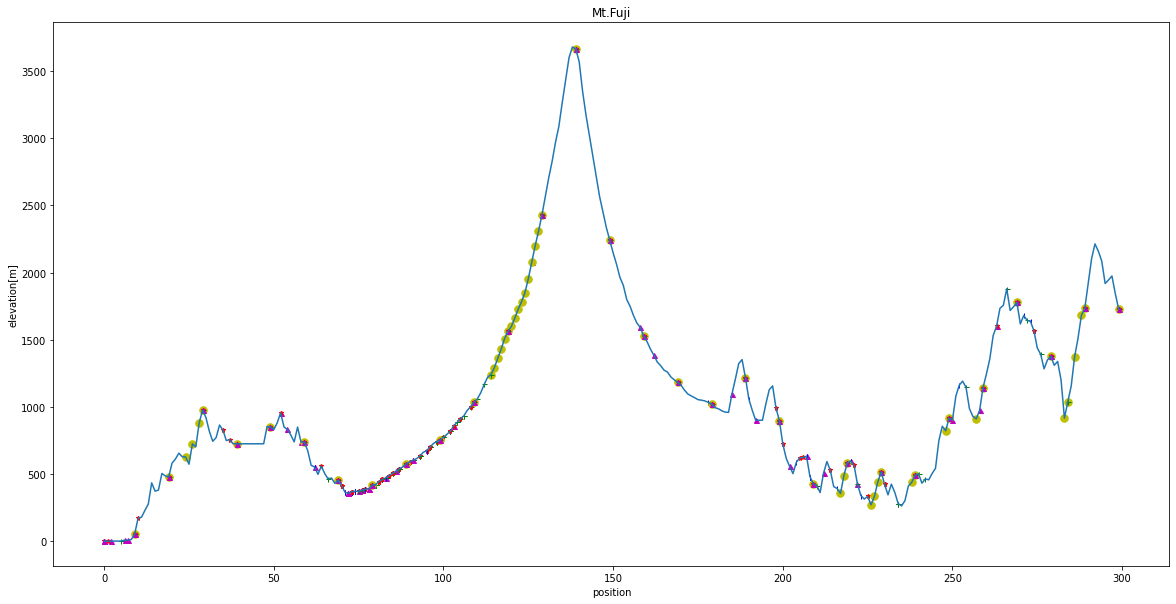

In [21]:


fujix = fuji[:,0]
fujiy = fuji[:,3]

#今いる地点point2とする ハイパーパラメータα
def Destination_point(point2,α):
  num2 = 0
  num2= fujix[point2]  - α* KOUBAI(point2)
  num3 =int(np.round(num2))

  if(num3<0):
    Destination_point2 = 0
    return 0
  else:
    Destination_point2 = num3   
    return Destination_point2

# point2 = 136
# Destination_point(point2)


import math

# fujix = fuji[:,0]
# # print(fujix)
# fujiy = fuji[:,3]
# # print(fujiy)
# # Point_for_each_move = []
# # point2 = 136
def Goes_down_the_mountain(point2,α):
  # for i in range(point2,1,-1):
  Point_for_each_move = []
  nowPoint =  point2
  Point_for_each_move.append(nowPoint)
  # nextPoint = Destination_point(nowPoint)
  CNT = 0
  while(True):
    # print(nowPoint)
    nextPoint = Destination_point(nowPoint,α)
    # Point_for_each_move.append(nextPoint)
    # if(math.fabs(nextPoint  - nowPoint) <1):
    if(abs(nextPoint  - nowPoint) <1): #個々の絶対値つけた理由は差がマイナスになるかもしれないからつけた
    # if((abs(np.round(nextPoint))  - abs(np.round(nowPoint))) <=1):
      # print(nowPoint)
      # print(CNT)
      CNT = CNT + 1
      break
    elif(CNT >=20):
      break;
    else:
      # nextPoint = Destination_point(nowPoint)
      Point_for_each_move.append(nextPoint)
      nowPoint = nextPoint
      CNT = CNT + 1
  return Point_for_each_move


import math

fujix = fuji[:,0]
# print(fujix)
fujiy = fuji[:,3]
# print(fujiy)
# Point_for_each_move = []

#自由に変更できる初期値をpoint3とする
def Goes_down_the_mountain2(point3,α):
  Point_for_each_move = []
  # Point_for_each_move.append(point3)
  for j in range(point3,0,-1):  #Goes_down_the_mountain(point2)
  # for j in Goes_down_the_mountain(point3):  #Goes_down_the_mountain(point2)
    # Point_for_each_move = []
    poList = Goes_down_the_mountain(j,α)
    # poList = Destination_point(j)
    Point_for_each_move.append(poList)
  return Point_for_each_move
  # print(Point_for_each_move)

# point3 = 298
# Point_for_each_move = Goes_down_the_mountain2(point3)


import matplotlib.pyplot as plt
import numpy as np
#いくつかの初期値j2とする。j2=136と１42にします。
#j2=136の場合
Pointy2 = []
Pointy5 = []
Pointy6 = []
Pointy7 = []
Pointy8 = []
point4 = 299
# point4List = []
# point5List = []
# point6List = []
# point7List = []
# point8List = []
# point4List = Goes_down_the_mountain2(point4)
# point4List = Goes_down_the_mountain(point4) 
# point4List = Destination_point(point4) 
α = 0.01
point4List = Goes_down_the_mountain2(point4,α) #Destination_point(nowPoint) 
α = 0.1
point5List = Goes_down_the_mountain2(point4,α) #Destination_point(nowPoint) 
α = 0.2
point6List = Goes_down_the_mountain2(point4,α) #Destination_point(nowPoint) 
α = 0.3
point7List = Goes_down_the_mountain2(point4,α) #Destination_point(nowPoint) 
α = 0.6
point8List = Goes_down_the_mountain2(point4,α) #Destination_point(nowPoint) 
# α = 5
# point9List = Goes_down_the_mountain2(point4,α) #Destination_point(nowPoint) 
# print(point4List)

for j in point4List:
  fujiy3 = fuji[j,3]
  Pointy2.append(fujiy3)
for j in point5List:
  fujiy5 = fuji[j,3]
  Pointy5.append(fujiy5)
for j in point6List:
  fujiy6 = fuji[j,3]
  Pointy6.append(fujiy6)
for j in point7List:
  fujiy7 = fuji[j,3]
  Pointy7.append(fujiy7)
for j in point8List:
  fujiy8 = fuji[j,3]
  Pointy8.append(fujiy8)
# print(point4List[0])
# print(Pointy2[0])

# for j in range(len(point4List)):

plt.figure(figsize=(20,10))
for j in range(0,299,10):
  # print(j)
  plt.plot(point4List[j],Pointy2[j],marker='.',color = 'y',markersize = 15,linestyle='none',label='line 0.01')
  plt.plot(point5List[j],Pointy5[j],marker='+',color = 'g',markersize = 5,linestyle='none',label='line 0.1')
  plt.plot(point6List[j],Pointy6[j],marker='*',color = 'r',markersize = 5,linestyle='none',label='line 0.2')
  plt.plot(point7List[j],Pointy7[j],marker='|',color = 'b',markersize = 5,linestyle='none',label='line 0.3')
  plt.plot(point8List[j],Pointy8[j],marker='^',color = 'm',markersize = 5,linestyle='none',label='line 0.6')
  # plt.plot(point9List[j],Pointy2[j],marker='',color = 'm',markersize = 5,linestyle='none')
# plt.figure(figsize=(10,10))
plt.plot((fuji[0:,[0]]),(fuji[0:,[3]]))
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.title("Mt.Fuji")
# plt.legend()
# /*実際にグラフに出力*/
plt.show()
